In [206]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.patches as mpatches

In [207]:
df = pd.read_csv('highcorr_including_soil.csv')
df

,latitude,longitude,correlation,p_value,color
0,33.375,35.875,0.625375,1.622228e-24,yellow
1,33.375,36.125,0.640428,5.537799e-26,yellow
2,33.625,35.625,0.636532,1.351164e-25,yellow
3,33.625,35.875,0.631958,3.789665e-25,yellow
4,33.625,36.125,0.647054,1.178821e-26,yellow
...,...,...,...,...,...
2270,50.625,6.625,0.619549,5.708839e-24,yellow
2271,50.625,6.875,0.614448,1.681825e-23,yellow
2272,50.625,7.125,0.601934,2.195051e-22,yellow
2273,50.875,5.875,0.632447,3.396695e-25,yellow


In [208]:
# Convert DataFrame to GeoDataFrame
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
df = df.drop(['longitude', 'latitude'], axis=1)
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")  # Set the CRS to WGS84

In [209]:
# Load world shapefile
world = gpd.read_file('Four_climate_zones_projected.shp')  # replace with your path

In [210]:
# Make sure both GeoDataFrames are in the same CRS
world = world.to_crs(gdf.crs)
world

,fid,DN,climate,Zones,Area,geometry
0,13.0,29.0,ET,E,102331.451,"MULTIPOLYGON (((-0.60000 43.00000, -0.70000 43..."
1,156.0,8.0,Csa,C,2358368.530,"MULTIPOLYGON (((-8.70000 33.00000, -8.70000 33..."
2,285.0,17.0,Dsa,D,1945512.571,"MULTIPOLYGON (((-3.80000 41.00000, -3.90000 41..."
3,408.0,4.0,BWh,B,2034958.736,"MULTIPOLYGON (((-5.60000 33.60000, -5.60000 33..."


In [211]:
# Perform a spatial join between points and polygons (here, countries)
gdf_sjoined = gpd.sjoin(gdf, world, how="inner", op="within")

C:\Users\emman\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [212]:
# Group by country and calculate the mean
mean_ave_by_country = gdf_sjoined.groupby('Zones')['correlation'].count()  # replace 'name' with your country column name

In [213]:
# Convert Series to DataFrame
mean_ave_df1 = mean_ave_by_country.reset_index()
print(mean_ave_df1)

  Zones  correlation
0     B          254
1     C         1627
2     D          339
3     E           22


In [214]:
#mean_ave_df1.sort_values(by='correlation', ascending=False, inplace=True)

In [215]:
mean_ave_df1['correlation'].idxmax()


1

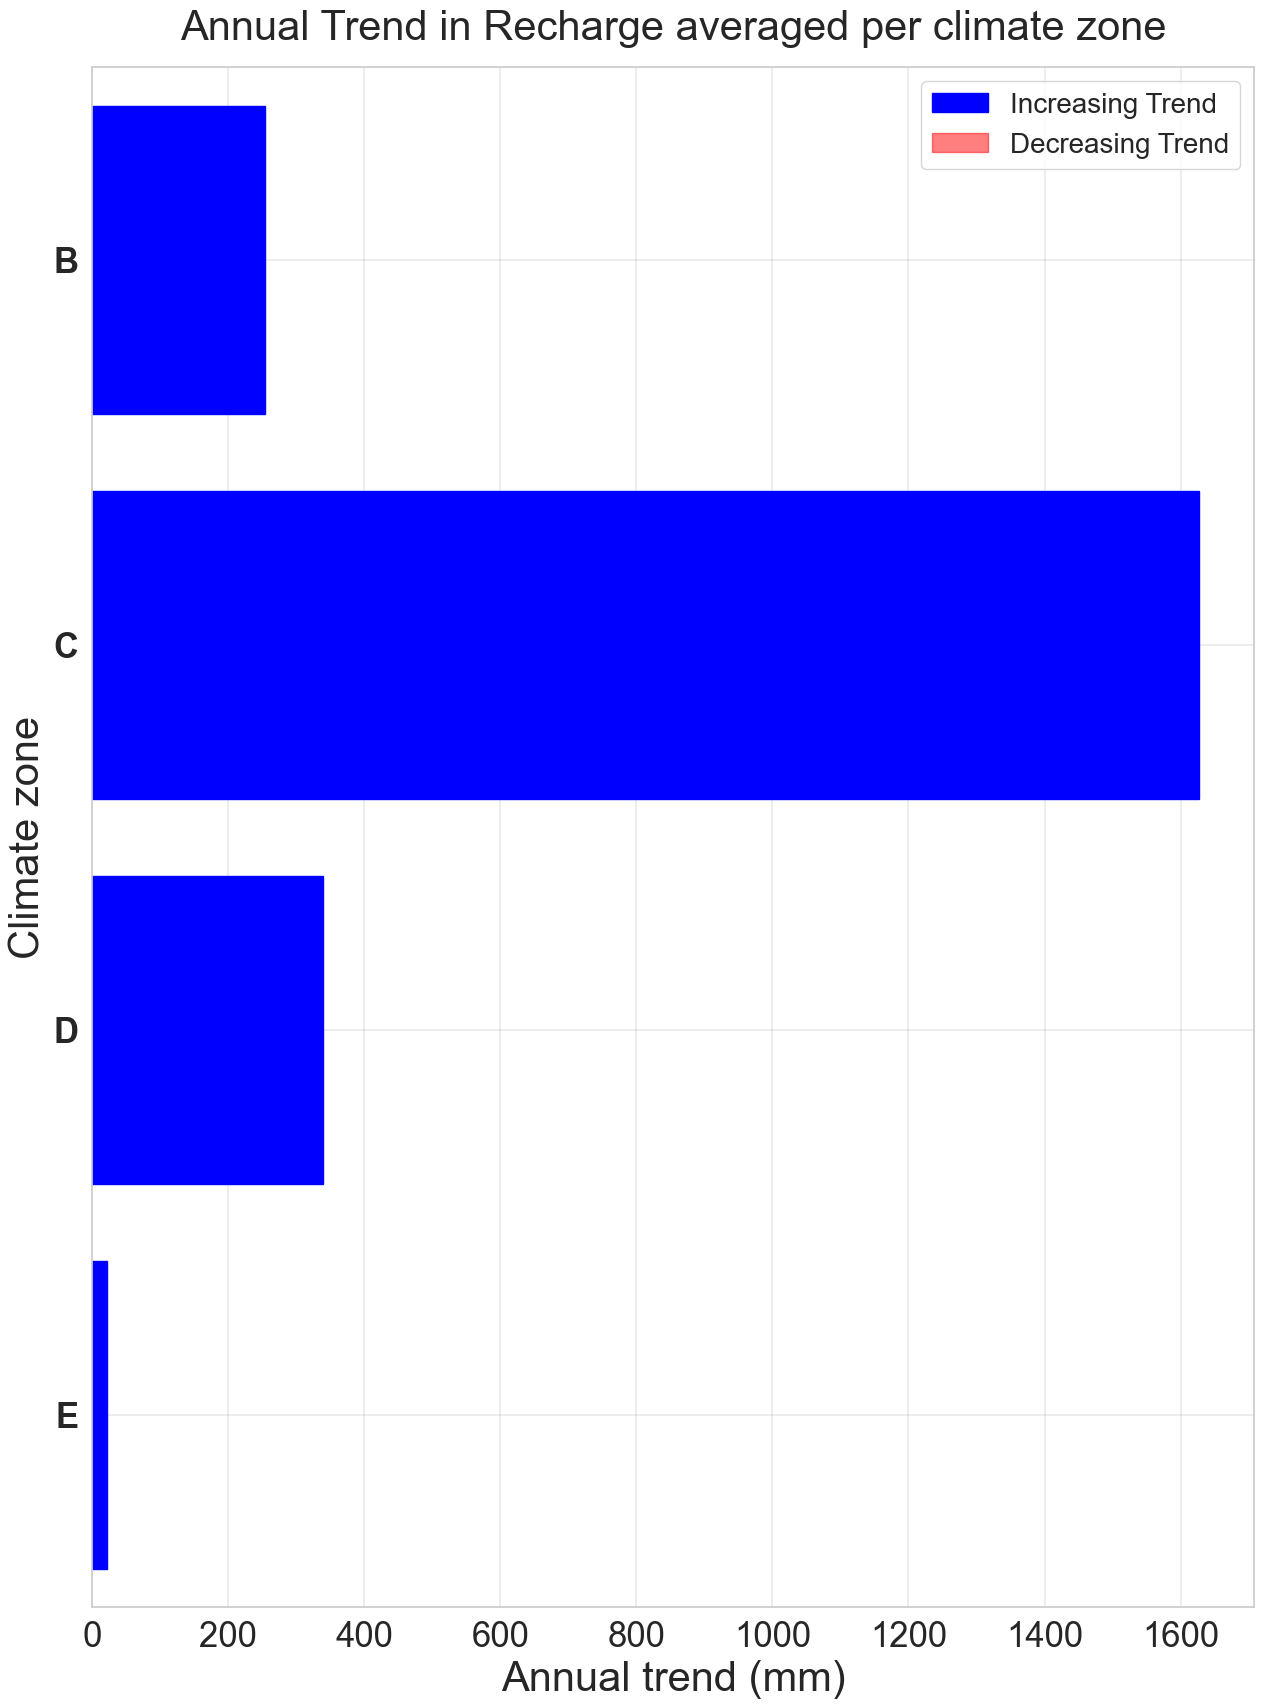

In [216]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a theme
sns.set_theme(style="whitegrid")

# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 20))

# Create the barplot with seaborn
barplot = sns.barplot(x="correlation", y="Zones", data=mean_ave_df1, ax=ax)

# Iterate over the bars and set the color manually
for bar in barplot.patches:
    if bar.get_width() < 0:
        bar.set_color('darkred')  # use darkred for negative values
    else:
        bar.set_color('blue')  # use blue for positive values

# Set grid
ax.grid(True, which='both', color='black', linewidth=0.1)

# Add labels and title
ax.set_xlabel("Annual trend (mm)", fontsize=30)
ax.set_ylabel("Climate zone", fontsize=30)
ax.set_title("Annual Trend in Recharge averaged per climate zone", fontsize=30, pad=20)

# Increase the font size for x-axis and y-axis labels
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)

# Set y-axis labels to bold
for label in ax.get_yticklabels():
    label.set_weight('bold')
    
# Create a legend
blue_patch = mpatches.Patch(color='blue', label='Increasing Trend')
red_patch = mpatches.Patch(color='red', label='Decreasing Trend', alpha=0.5)
plt.legend(handles=[blue_patch, red_patch], fontsize=20)

# Show the plot
plt.show()

In [217]:
df = pd.read_csv('highcorr_without_soil.csv')
df

,latitude,longitude,correlation,p_value,color
0,28.125,38.875,-0.639426,6.974637e-26,darkred
1,28.125,39.125,-0.643166,2.935598e-26,darkred
2,28.125,39.375,-0.658346,7.714952e-28,darkred
3,28.375,38.125,-0.652975,2.863134e-27,darkred
4,28.375,38.375,-0.654177,2.139844e-27,darkred
...,...,...,...,...,...
1345,51.125,10.875,-0.654408,2.023099e-27,darkred
1346,51.125,11.125,-0.659117,6.376795e-28,darkred
1347,51.125,11.375,-0.661974,3.132745e-28,darkred
1348,51.125,11.625,-0.665720,1.219468e-28,darkred


In [218]:
# Convert DataFrame to GeoDataFrame
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
df = df.drop(['longitude', 'latitude'], axis=1)
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")  # Set the CRS to WGS84

In [219]:
# Load world shapefile
world = gpd.read_file('Four_climate_zones_projected.shp')  # replace with your path

In [220]:
# Make sure both GeoDataFrames are in the same CRS
world = world.to_crs(gdf.crs)
world

,fid,DN,climate,Zones,Area,geometry
0,13.0,29.0,ET,E,102331.451,"MULTIPOLYGON (((-0.60000 43.00000, -0.70000 43..."
1,156.0,8.0,Csa,C,2358368.530,"MULTIPOLYGON (((-8.70000 33.00000, -8.70000 33..."
2,285.0,17.0,Dsa,D,1945512.571,"MULTIPOLYGON (((-3.80000 41.00000, -3.90000 41..."
3,408.0,4.0,BWh,B,2034958.736,"MULTIPOLYGON (((-5.60000 33.60000, -5.60000 33..."


In [221]:
# Perform a spatial join between points and polygons (here, countries)
gdf_sjoined = gpd.sjoin(gdf, world, how="inner", op="within")

C:\Users\emman\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [222]:
# Group by country and calculate the mean
mean_ave_by_country = gdf_sjoined.groupby('Zones')['correlation'].count()  # replace 'name' with your country column name

In [223]:
# Convert Series to DataFrame
mean_ave_df2 = mean_ave_by_country.reset_index()
print(mean_ave_df2)

  Zones  correlation
0     B          171
1     C          974
2     D          158
3     E           15


In [224]:
#mean_ave_df2.sort_values(by='correlation', ascending=False, inplace=True)
#mean_ave_df2

In [225]:
mean_ave_df2['correlation'].idxmax()


1

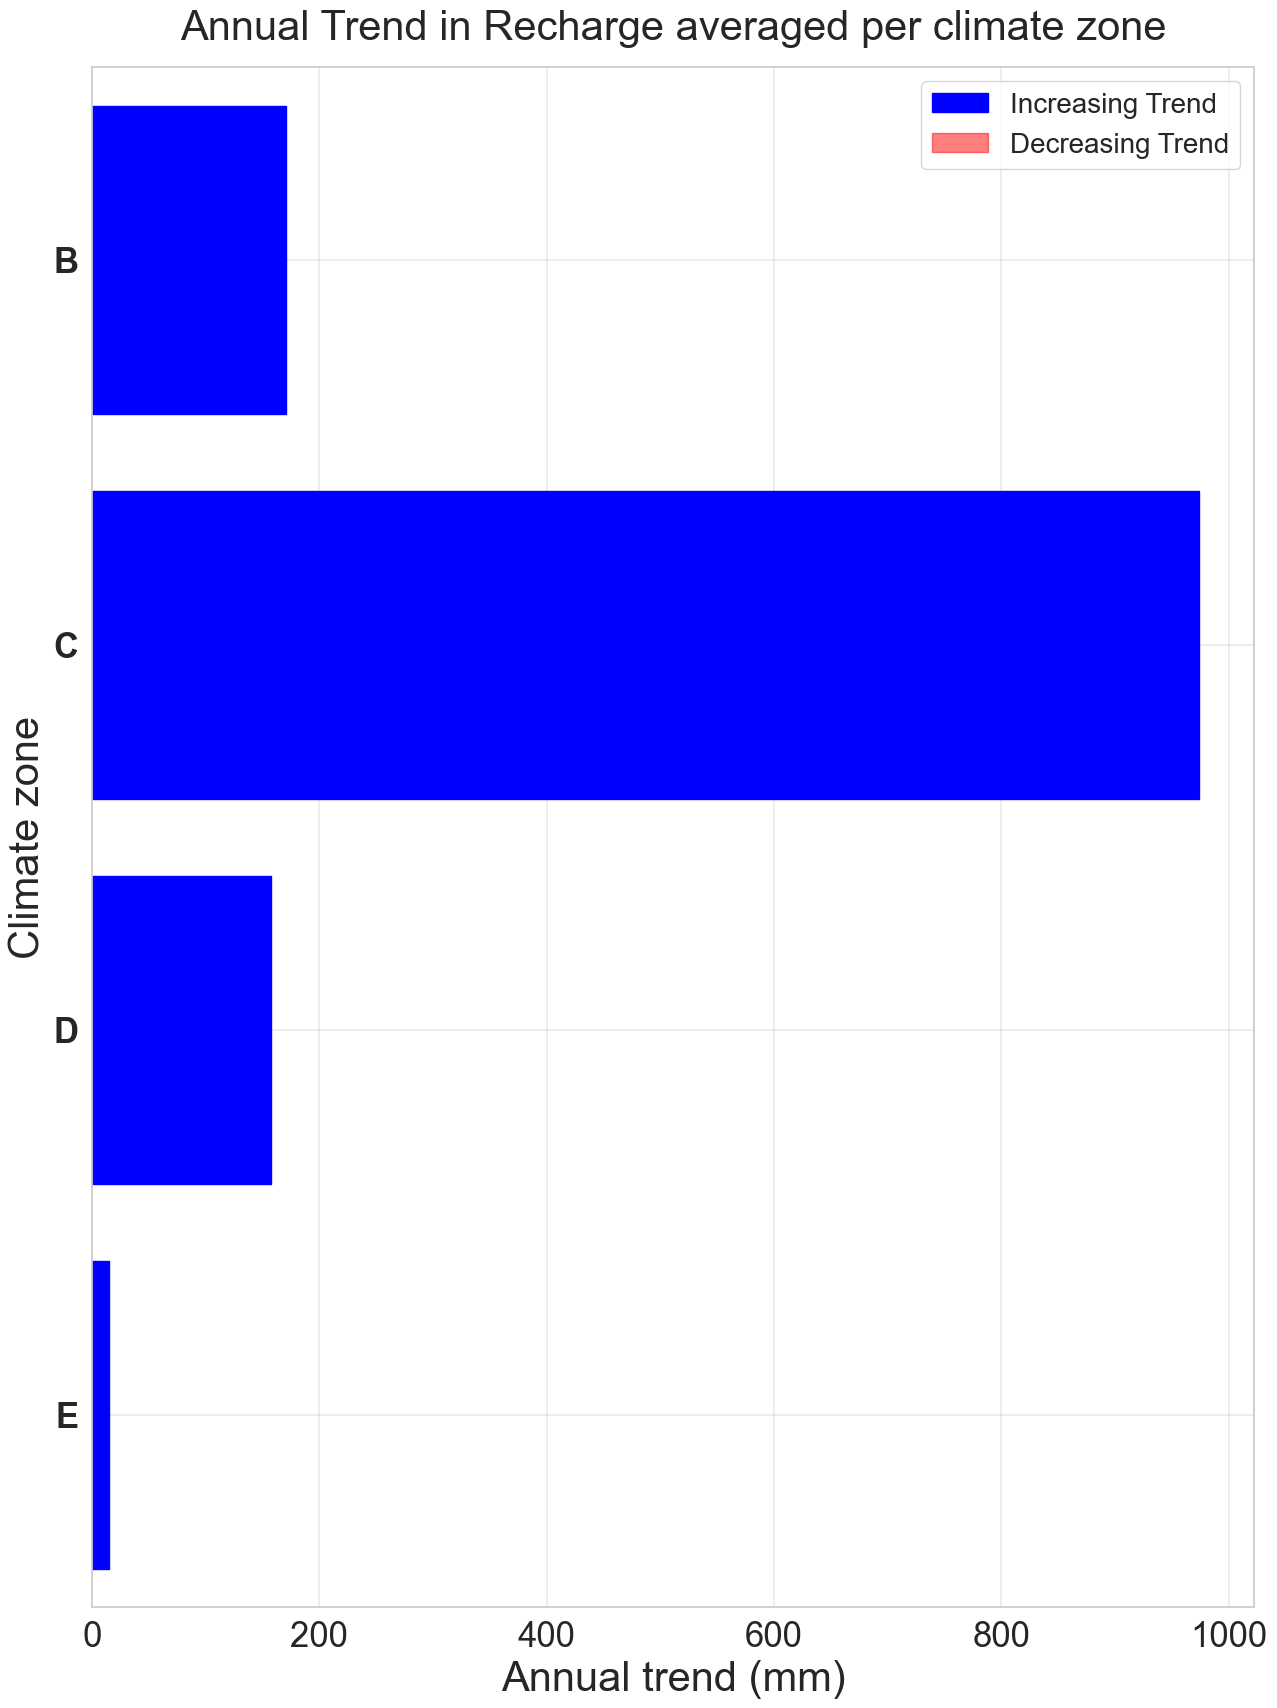

In [226]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a theme
sns.set_theme(style="whitegrid")

# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 20))

# Create the barplot with seaborn
barplot = sns.barplot(x="correlation", y="Zones", data=mean_ave_df2, ax=ax)

# Iterate over the bars and set the color manually
for bar in barplot.patches:
    if bar.get_width() < 0:
        bar.set_color('darkred')  # use darkred for negative values
    else:
        bar.set_color('blue')  # use blue for positive values

# Set grid
ax.grid(True, which='both', color='black', linewidth=0.1)

# Add labels and title
ax.set_xlabel("Annual trend (mm)", fontsize=30)
ax.set_ylabel("Climate zone", fontsize=30)
ax.set_title("Annual Trend in Recharge averaged per climate zone", fontsize=30, pad=20)

# Increase the font size for x-axis and y-axis labels
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)

# Set y-axis labels to bold
for label in ax.get_yticklabels():
    label.set_weight('bold')
    
# Create a legend
blue_patch = mpatches.Patch(color='blue', label='Increasing Trend')
red_patch = mpatches.Patch(color='red', label='Decreasing Trend', alpha=0.5)
plt.legend(handles=[blue_patch, red_patch], fontsize=20)

# Show the plot
plt.show()

In [227]:
mean_ave_df2['correlation1'] = mean_ave_df1['correlation']

In [228]:
mean_ave_df2

,Zones,correlation,correlation1
0,B,171,254
1,C,974,1627
2,D,158,339
3,E,15,22


In [229]:
data = ['Arid', 'Temperate', 'Cold', 'Polar']
df = pd.DataFrame(data, columns=['Column1'])

In [231]:
mean_ave_df2['Climate'] = df['Column1']
mean_ave_df2

,Zones,correlation,correlation1,Climate
0,B,171,254,Arid
1,C,974,1627,Temperate
2,D,158,339,Cold
3,E,15,22,Polar


In [232]:
mean_ave_df2['correlation'] = -mean_ave_df2['correlation']

In [233]:
mean_ave_df2.sort_values(by='correlation1', ascending=False, inplace=True)

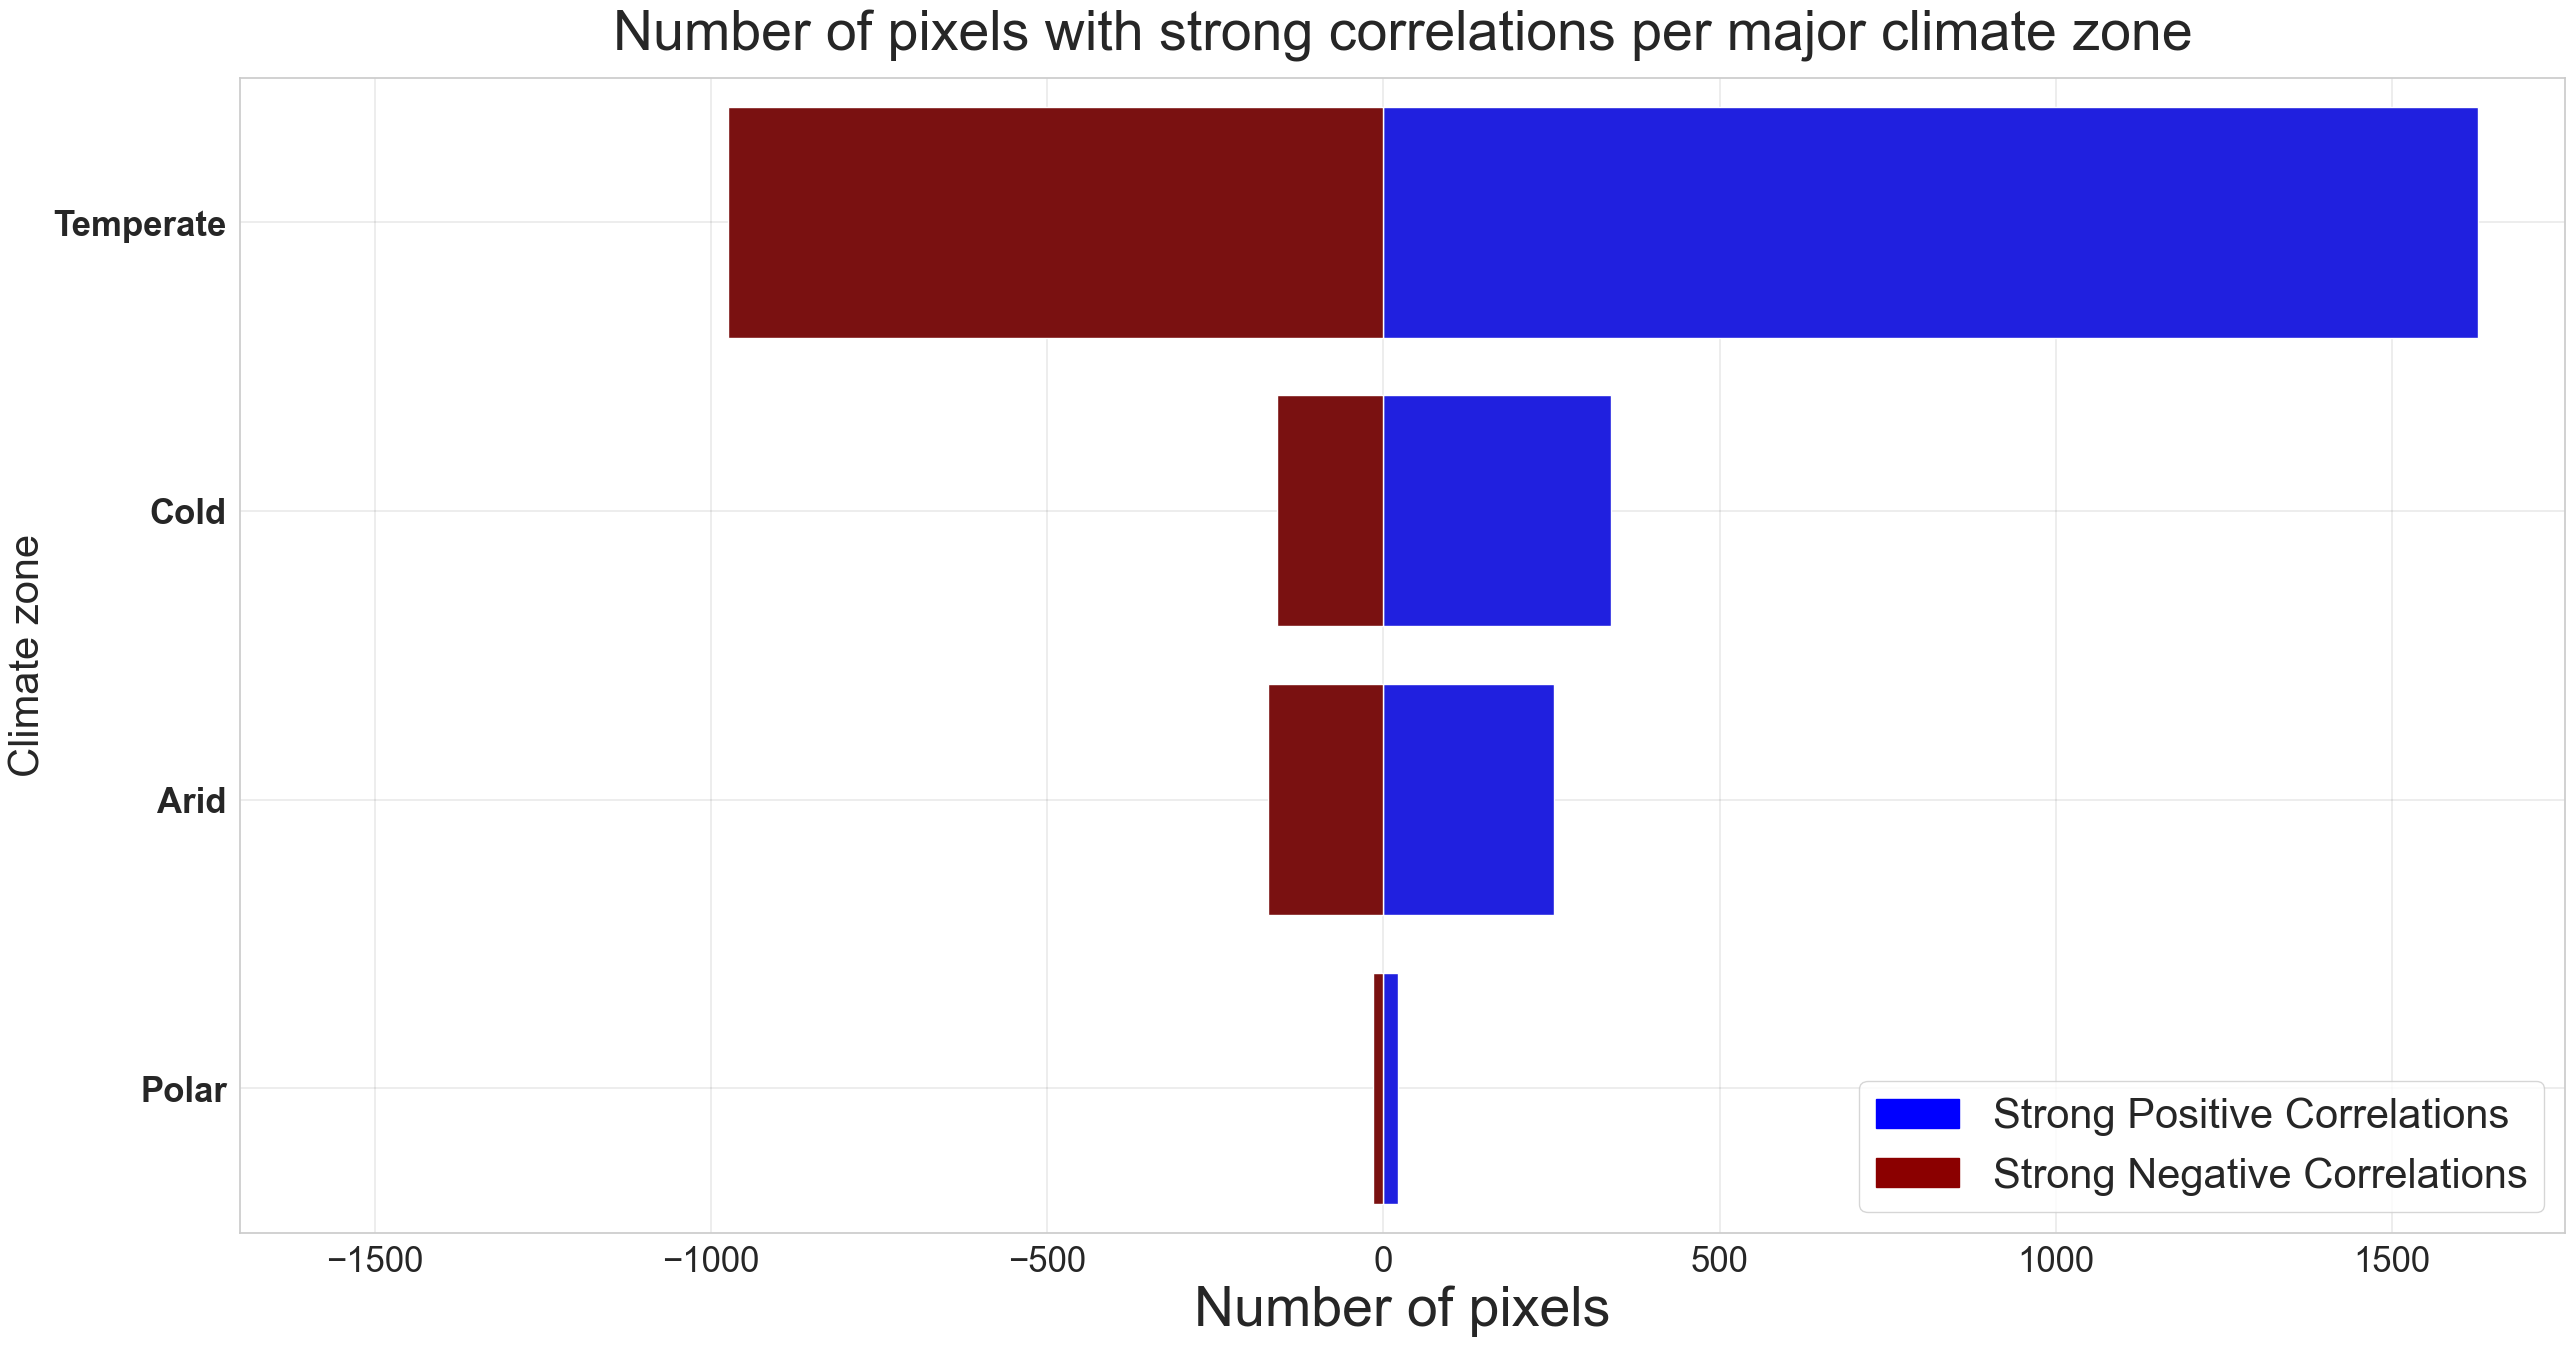

In [237]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Set a theme
sns.set_theme(style="whitegrid")

# Create a figure and axes
fig, ax = plt.subplots(figsize=(30, 15))

# Create the barplot with seaborn for 'Ave' column
barplot1 = sns.barplot(x="correlation1", y="Climate", data=mean_ave_df2, ax=ax, color='blue')

# Create the barplot with seaborn for 'rech' column - make sure to replace 'rech' with your actual column name
barplot2 = sns.barplot(x="correlation", y="Climate", data=mean_ave_df2, ax=ax, color='darkred', alpha=1)

# Set the x-axis minimum to 1500 
ax.set_xlim(-1700, None)

# Set grid
ax.grid(True, which='both', color='black', linewidth=0.1)

# Add labels and title
ax.set_xlabel("Number of pixels", fontsize=40)
ax.set_ylabel("Climate zone", fontsize=30)
ax.set_title("Number of pixels with strong correlations per major climate zone", fontsize=40, pad=20)

# Increase the font size for x-axis and y-axis labels
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)

# Create a legend
blue_patch = mpatches.Patch(color='blue', label='Strong Positive Correlations')
red_patch = mpatches.Patch(color='darkred', label='Strong Negative Correlations', alpha=1)
plt.legend(handles=[blue_patch, red_patch], fontsize=30, loc='lower right')

# Set y-axis labels to bold
for label in ax.get_yticklabels():
    label.set_weight('bold')

# Show the plot
plt.show()